<a href="https://colab.research.google.com/github/sudo0809/Credit-Risk-Prediction/blob/main/Credit_risk_prediction_using_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sudo0809/Credit-Risk-Prediction/main/Training%20Data.csv")
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.drop("Id", axis=1, inplace=True)
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.isnull().values.any()

False

In [6]:
df.shape

(252000, 12)

In [7]:
print(f"count of risk flag = 1 is {df[df['risk_flag']==1].shape[0]} i.e {(df[df['risk_flag']==1].shape[0]/df.shape[0])*100} % of total data")
print(f"count of risk flag = 0 is {df[df['risk_flag']==0].shape[0]} i.e {(df[df['risk_flag']==0].shape[0]/df.shape[0])*100} % of total data")

count of risk flag = 1 is 30996 i.e 12.3 % of total data
count of risk flag = 0 is 221004 i.e 87.7 % of total data


In [8]:
data = df.copy()

## Encoding the Categorical Data

In [9]:
married_le = preprocessing.LabelEncoder()
married_le.fit(df['married'].unique())
print(married_le.classes_)
df['married'] = married_le.transform(df["married"])
df['married'].unique()

['married' 'single']


array([1, 0])

In [10]:
car_le = preprocessing.LabelEncoder()
car_le.fit(df['car_ownership'].unique())
print(car_le.classes_)
df['car_ownership'] = car_le.transform(df['car_ownership'])
df['car_ownership'].unique()

['no' 'yes']


array([0, 1])

In [11]:
house_le = preprocessing.LabelEncoder()
house_le.fit(df['house_ownership'].unique())
print(house_le.classes_)
df['house_ownership'] = house_le.transform(df['house_ownership'])
df['house_ownership'].unique()

['norent_noown' 'owned' 'rented']


array([2, 0, 1])

In [12]:
# 1st method tried
'''
hash_enc = ce.hashing.HashingEncoder(cols='profession' , max_process=4)
# hash_enc.fit(balanced_data['profession'])

data1 = hash_enc.fit_transform(balanced_data)
print(hash_enc.get_feature_names())
'''
#2nd method
'''
binary_enc = ce.BinaryEncoder(cols=['profession', 'state'])
data1 = binary_enc.fit_transform(balanced_data)
'''
#3rd method
profession_le = preprocessing.LabelEncoder()
profession_le.fit(df['profession'])
df['profession'] = profession_le.transform(df['profession'])
print(profession_le.classes_)
df['profession'].unique()

['Air_traffic_controller' 'Analyst' 'Architect' 'Army_officer' 'Artist'
 'Aviator' 'Biomedical_Engineer' 'Chartered_Accountant' 'Chef'
 'Chemical_engineer' 'Civil_engineer' 'Civil_servant' 'Comedian'
 'Computer_hardware_engineer' 'Computer_operator' 'Consultant' 'Dentist'
 'Design_Engineer' 'Designer' 'Drafter' 'Economist' 'Engineer'
 'Fashion_Designer' 'Financial_Analyst' 'Firefighter' 'Flight_attendant'
 'Geologist' 'Graphic_Designer' 'Hotel_Manager' 'Industrial_Engineer'
 'Lawyer' 'Librarian' 'Magistrate' 'Mechanical_engineer' 'Microbiologist'
 'Official' 'Petroleum_Engineer' 'Physician' 'Police_officer' 'Politician'
 'Psychologist' 'Scientist' 'Secretary' 'Software_Developer'
 'Statistician' 'Surgeon' 'Surveyor' 'Technical_writer' 'Technician'
 'Technology_specialist' 'Web_designer']


array([33, 43, 47, 11, 31, 20, 25,  2, 18, 37, 23,  0, 39, 38,  4, 46, 17,
        9, 28, 16, 12,  6, 27, 13, 36, 42, 14,  7, 48, 34, 22,  5, 40, 32,
       30, 24, 21, 35,  1, 26, 19, 44, 50, 15,  8,  3, 45, 41, 10, 29, 49])

In [13]:
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,1,2,0,33,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,1,2,0,43,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,0,2,0,47,Alappuzha,Kerala,4,10,0
3,6256451,41,2,1,2,1,43,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,1,2,0,11,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [14]:
my_dict = {}
for col_name in df.columns:
  if len(data[col_name].unique())<60:
    print(col_name, " = ", data[col_name].unique())
    print()
  else:
    print(f"{col_name} = {len(data[col_name].unique())} unique values")
    print()
  my_dict[col_name] = data[col_name].unique()

income = 41917 unique values

age  =  [23 40 66 41 47 64 58 33 24 78 22 28 57 48 39 72 56 54 50 35 76 38 31 52
 59 21 26 55 45 77 71 63 30 25 73 75 27 74 67 46 68 36 79 42 60 32 65 49
 61 29 37 69 62 53 70 34 43 44 51]

experience  =  [ 3 10  4  2 11  0 14 17 12  7  9  6  8  1 13 19 15 20  5 16 18]

married  =  ['single' 'married']

house_ownership  =  ['rented' 'norent_noown' 'owned']

car_ownership  =  ['no' 'yes']

profession  =  ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistr

## Taking only balanced Data
### 50% risk flag = 1 and 50% risk_flag = 0

In [15]:
risk_high_data = df[df['risk_flag']==1]
risk_low_data = df[df['risk_flag']==0]

m_low = min(len(risk_high_data), len(risk_low_data))

balanced_data = pd.concat([risk_high_data[:m_low], risk_low_data[:m_low]]).sample(frac=1)
print(f"Balanced Data shape = {balanced_data.shape}")
print(f"count of risk flag = 1 is {balanced_data[balanced_data['risk_flag']==1].shape[0]}")
print(f"count of risk flag = 0 is {balanced_data[balanced_data['risk_flag']==0].shape[0]}")

Balanced Data shape = (61992, 12)
count of risk flag = 1 is 30996
count of risk flag = 0 is 30996


In [16]:
cols = list(df.columns)
cols

['income',
 'age',
 'experience',
 'married',
 'house_ownership',
 'car_ownership',
 'profession',
 'city',
 'state',
 'current_job_years',
 'current_house_years',
 'risk_flag']

[]

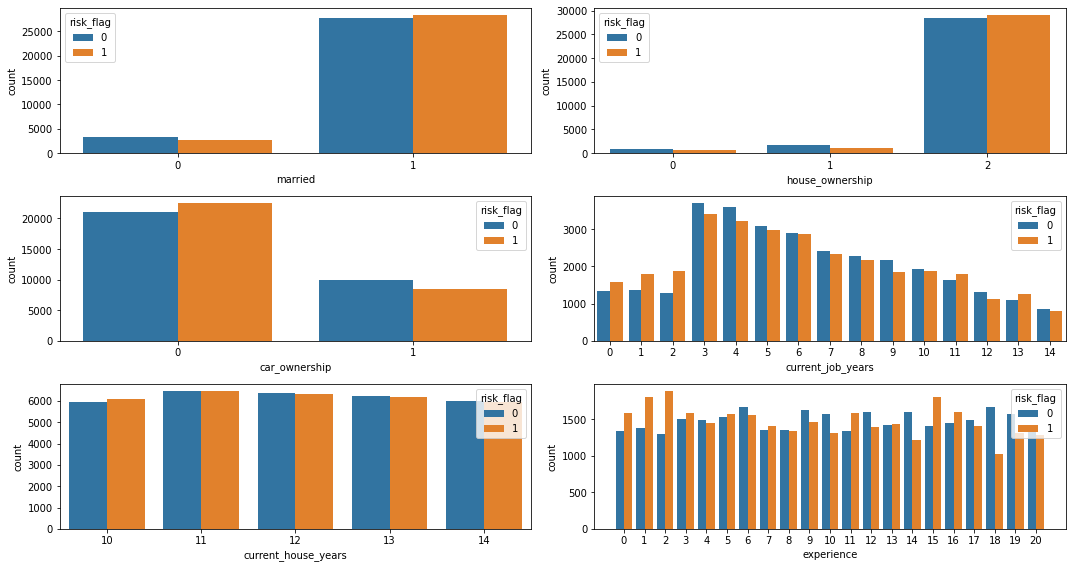

In [17]:
features = ['married', 'house_ownership','car_ownership', 'current_job_years','current_house_years', 'experience']

plt.figure(figsize=(15,8))
for i,feature in enumerate(features):
  plt.subplot(len(features)/2, 2, i+1)
  sns.countplot(x=feature, data=balanced_data, hue='risk_flag')
plt.tight_layout()
plt.plot()

### Trying to find correalation between professions on basis of their income

[]

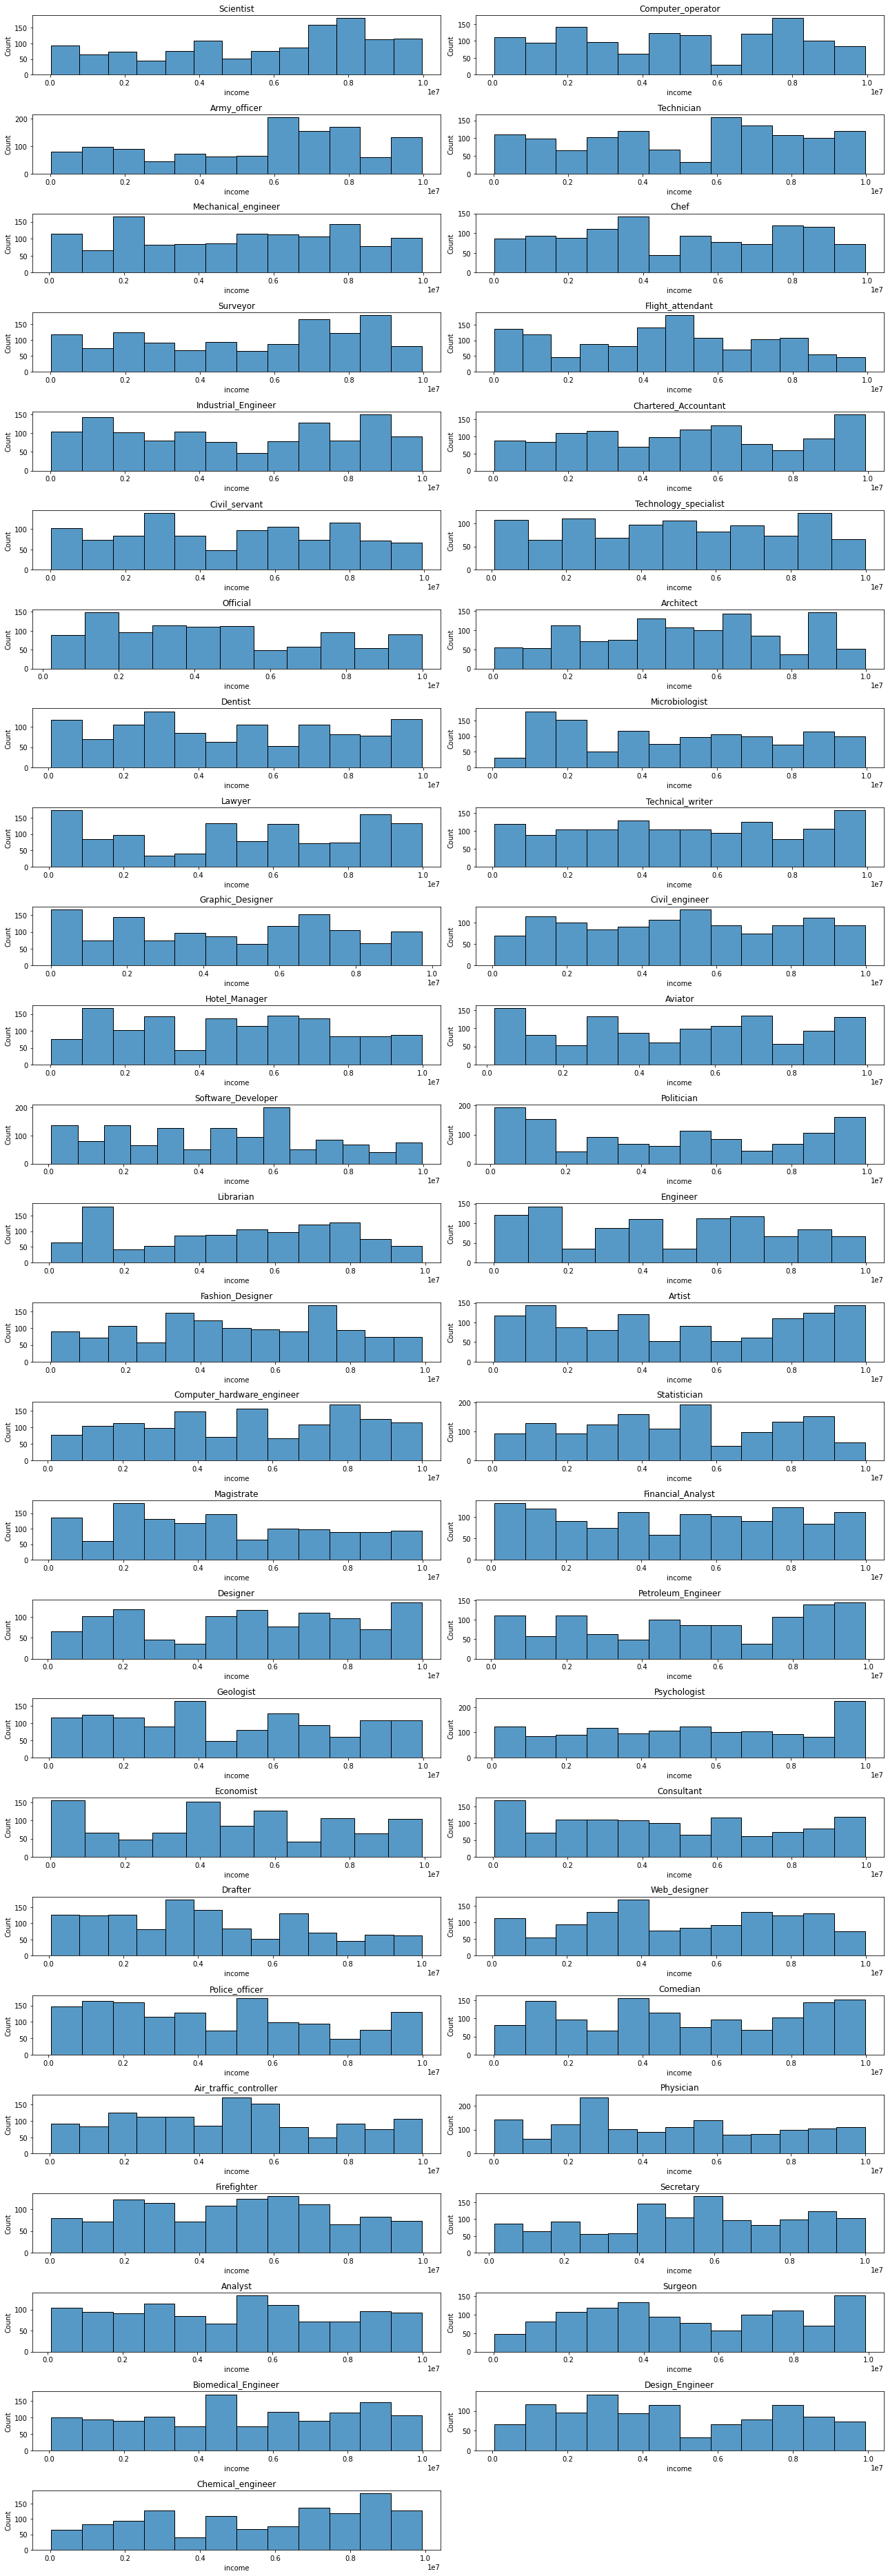

In [12]:
# plt.figure(figsize=(18,12))
# sns.histplot(x=balanced_data.income[balanced_data.profession=='Software_Developer'] , data=balanced_data)
# plt.title('Software Developer',)

plt.figure(figsize=(18,52))
for i,job in enumerate(my_dict['profession']):
  plt.subplot(52/2, 2, i+1)
  sns.histplot(x=balanced_data.income[balanced_data.profession==job] , data=balanced_data)
  plt.title(job)
plt.tight_layout()
plt.plot()

In [13]:
jobs = my_dict['profession']
income_len = []
for i in jobs:
  income_len.append(len(balanced_data.income[balanced_data.profession==i]))

print(income_len)

[1244, 1246, 1237, 1223, 1255, 1122, 1264, 1281, 1189, 1215, 1062, 995, 1017, 1172, 1120, 1192, 1213, 1316, 1250, 1161, 1325, 1190, 1342, 1189, 1093, 980, 1297, 1186, 1350, 1393, 1309, 1201, 1074, 1094, 1244, 1350, 1018, 1195, 1284, 1271, 1407, 1297, 1342, 1477, 1155, 1277, 1132, 1151, 1278, 1085, 1232]


In [14]:
len(balanced_data.income[balanced_data.profession=='Firefighter'])

1155

In [15]:
jobs_data = {}
for job in jobs:
  jobs_data[job] = balanced_data.income[balanced_data.profession == job] 

jobs_data = pd.DataFrame(jobs_data)
jobs_data.head()

,Scientist,Computer_operator,Army_officer,Technician,Mechanical_engineer,Chef,Surveyor,Flight_attendant,Industrial_Engineer,Chartered_Accountant,Civil_servant,Technology_specialist,Official,Architect,Dentist,Microbiologist,Lawyer,Technical_writer,Graphic_Designer,Civil_engineer,Hotel_Manager,Aviator,Software_Developer,Politician,Librarian,Engineer,Fashion_Designer,Artist,Computer_hardware_engineer,Statistician,Magistrate,Financial_Analyst,Designer,Petroleum_Engineer,Geologist,Psychologist,Economist,Consultant,Drafter,Web_designer,Police_officer,Comedian,Air_traffic_controller,Physician,Firefighter,Secretary,Analyst,Surgeon,Biomedical_Engineer,Design_Engineer,Chemical_engineer
0,NaN,NaN,NaN,NaN,1303835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7574516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3991815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6256451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5768871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for i in jobs_data.columns[jobs_data.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    jobs_data[i].fillna(jobs_data[i].mean(),inplace=True)

In [17]:
jobs_data.head()

,Scientist,Computer_operator,Army_officer,Technician,Mechanical_engineer,Chef,Surveyor,Flight_attendant,Industrial_Engineer,Chartered_Accountant,Civil_servant,Technology_specialist,Official,Architect,Dentist,Microbiologist,Lawyer,Technical_writer,Graphic_Designer,Civil_engineer,Hotel_Manager,Aviator,Software_Developer,Politician,Librarian,Engineer,Fashion_Designer,Artist,Computer_hardware_engineer,Statistician,Magistrate,Financial_Analyst,Designer,Petroleum_Engineer,Geologist,Psychologist,Economist,Consultant,Drafter,Web_designer,Police_officer,Comedian,Air_traffic_controller,Physician,Firefighter,Secretary,Analyst,Surgeon,Biomedical_Engineer,Design_Engineer,Chemical_engineer
0,5.688815e+06,4.970570e+06,5.571531e+06,5.190680e+06,1.303835e+06,4.994675e+06,5.303235e+06,4.609739e+06,4.963921e+06,5.211001e+06,4.815896e+06,4.992534e+06,4.623760e+06,5.167268e+06,4.926439e+06,4.962999e+06,5.156056e+06,5.119637e+06,4675128.028,5.056963e+06,4.805578e+06,5.027789e+06,4.577065e+06,4.729681e+06,4.952862e+06,4.700973e+06,5.008554e+06,5.044414e+06,5.275280e+06,4.905456e+06,4.677260e+06,4.956153e+06,5.379038e+06,5383430.5,4.774411e+06,5.349087e+06,4.841927e+06,4.659545e+06,4.322350e+06,5.062199e+06,4.466719e+06,5.173603e+06,4.801514e+06,4.729933e+06,4.992956e+06,5.442130e+06,4.918596e+06,5.181772e+06,5.206573e+06,4.760711e+06,5.571240e+06
1,5.688815e+06,4.970570e+06,5.571531e+06,5.190680e+06,5.005563e+06,4.994675e+06,5.303235e+06,4.609739e+06,4.963921e+06,5.211001e+06,4.815896e+06,4.992534e+06,4.623760e+06,5.167268e+06,4.926439e+06,4.962999e+06,5.156056e+06,5.119637e+06,4675128.028,5.056963e+06,4.805578e+06,5.027789e+06,7.574516e+06,4.729681e+06,4.952862e+06,4.700973e+06,5.008554e+06,5.044414e+06,5.275280e+06,4.905456e+06,4.677260e+06,4.956153e+06,5.379038e+06,5383430.5,4.774411e+06,5.349087e+06,4.841927e+06,4.659545e+06,4.322350e+06,5.062199e+06,4.466719e+06,5.173603e+06,4.801514e+06,4.729933e+06,4.992956e+06,5.442130e+06,4.918596e+06,5.181772e+06,5.206573e+06,4.760711e+06,5.571240e+06
2,5.688815e+06,4.970570e+06,5.571531e+06,5.190680e+06,5.005563e+06,4.994675e+06,5.303235e+06,4.609739e+06,4.963921e+06,5.211001e+06,4.815896e+06,4.992534e+06,4.623760e+06,5.167268e+06,4.926439e+06,4.962999e+06,5.156056e+06,3.991815e+06,4675128.028,5.056963e+06,4.805578e+06,5.027789e+06,4.577065e+06,4.729681e+06,4.952862e+06,4.700973e+06,5.008554e+06,5.044414e+06,5.275280e+06,4.905456e+06,4.677260e+06,4.956153e+06,5.379038e+06,5383430.5,4.774411e+06,5.349087e+06,4.841927e+06,4.659545e+06,4.322350e+06,5.062199e+06,4.466719e+06,5.173603e+06,4.801514e+06,4.729933e+06,4.992956e+06,5.442130e+06,4.918596e+06,5.181772e+06,5.206573e+06,4.760711e+06,5.571240e+06
3,5.688815e+06,4.970570e+06,5.571531e+06,5.190680e+06,5.005563e+06,4.994675e+06,5.303235e+06,4.609739e+06,4.963921e+06,5.211001e+06,4.815896e+06,4.992534e+06,4.623760e+06,5.167268e+06,4.926439e+06,4.962999e+06,5.156056e+06,5.119637e+06,4675128.028,5.056963e+06,4.805578e+06,5.027789e+06,6.256451e+06,4.729681e+06,4.952862e+06,4.700973e+06,5.008554e+06,5.044414e+06,5.275280e+06,4.905456e+06,4.677260e+06,4.956153e+06,5.379038e+06,5383430.5,4.774411e+06,5.349087e+06,4.841927e+06,4.659545e+06,4.322350e+06,5.062199e+06,4.466719e+06,5.173603e+06,4.801514e+06,4.729933e+06,4.992956e+06,5.442130e+06,4.918596e+06,5.181772e+06,5.206573e+06,4.760711e+06,5.571240e+06
4,5.688815e+06,4.970570e+06,5.571531e+06,5.190680e+06,5.005563e+06,4.994675e+06,5.303235e+06,4.609739e+06,4.963921e+06,5.211001e+06,5.768871e+06,4.992534e+06,4.623760e+06,5.167268e+06,4.926439e+06,4.962999e+06,5.156056e+06,5.119637e+06,4675128.028,5.056963e+06,4.805578e+06,5.027789e+06,4.577065e+06,4.729681e+06,4.952862e+06,4.700973e+06,5.008554e+06,5.044414e+06,5.275280e+06,4.905456e+06,4.677260e+06,4.956153e+06,5.379038e+06,5383430.5,4.774411e+06,5.349087e+06,4.841927e+06,4.659545e+06,4.322350e+06,5.062199e+06,4.466719e+06,5.173603e+06,4.801514e+06,4.729933e+06,4.992956e+06,5.442130e+06,4.918596e+06,5.181772e+06,5.206573e+06,4.760711e+06,5.571240e+06


In [20]:
plt.figure(figsize=(18,20)) 
sns.heatmap(jobs_data.corr(),cmap="Greens",square=True,)
plt.plot()

NameError: ignored

<Figure size 1296x1440 with 0 Axes>

They are not correlated in any ways

### coorrelation and final data preparation

In [22]:
balanced_data.head(10)

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
14091,1916815,53,8,1,2,0,38,Chinsurah,West_Bengal,8,14,0
245312,8709078,41,3,1,2,1,38,Satara,Maharashtra,3,14,1
22157,6129612,42,13,1,1,0,34,Amaravati,Andhra_Pradesh,6,12,0
251795,543631,54,18,1,2,1,36,Shimoga,Karnataka,7,11,1
69519,8622588,45,18,1,1,0,45,Agartala,Tripura,3,12,1
77032,6207088,35,16,1,2,0,20,Arrah,Bihar,13,13,1
208375,5091752,66,2,1,2,0,9,Bhilwara,Rajasthan,2,11,1
228281,803780,78,14,1,2,1,19,Rajpur_Sonarpur,West_Bengal,9,11,1
6353,8729941,33,20,1,2,0,47,Satara,Maharashtra,11,11,0
216793,2791072,61,13,1,2,1,25,Agartala,Tripura,5,10,1


In [23]:
df_final = balanced_data.drop(labels=['city','state'], axis=1)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61992 entries, 14091 to 195846
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   income               61992 non-null  int64
 1   age                  61992 non-null  int64
 2   experience           61992 non-null  int64
 3   married              61992 non-null  int64
 4   house_ownership      61992 non-null  int64
 5   car_ownership        61992 non-null  int64
 6   profession           61992 non-null  int64
 7   current_job_years    61992 non-null  int64
 8   current_house_years  61992 non-null  int64
 9   risk_flag            61992 non-null  int64
dtypes: int64(10)
memory usage: 7.7 MB


In [25]:
df_final.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag
14091,1916815,53,8,1,2,0,38,8,14,0
245312,8709078,41,3,1,2,1,38,3,14,1
22157,6129612,42,13,1,1,0,34,6,12,0
251795,543631,54,18,1,2,1,36,7,11,1
69519,8622588,45,18,1,1,0,45,3,12,1


In [27]:
# np.unique(df_final['profession_0'].values), np.unique(df_final['state_0'].values)

In [28]:
# df_final.drop(['profession_0', 'state_0'], axis=1, inplace=True)

[]

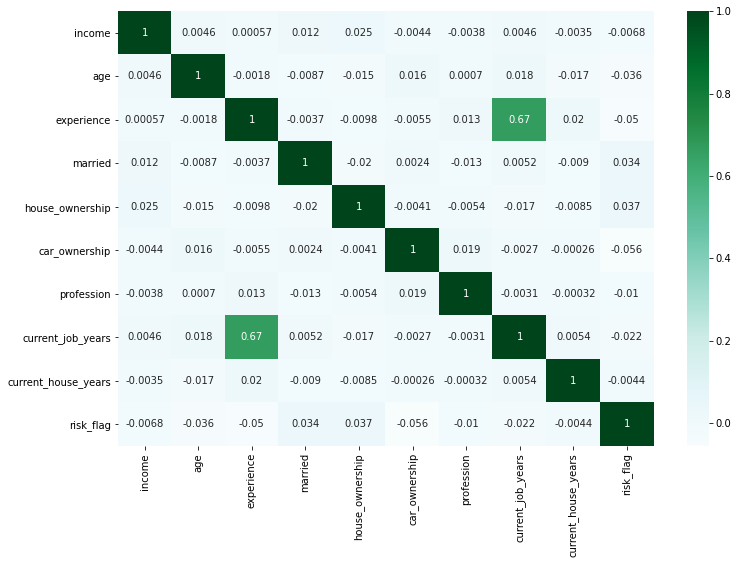

In [26]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df_final.corr(), annot=True, fmt='.2g', cmap='BuGn')
plt.plot()

In [27]:
scaler = preprocessing.MinMaxScaler()

In [28]:
scaler.fit(df_final)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
# scaler.data_max_ , scaler.data_min_

In [30]:
data2 = pd.DataFrame(scaler.transform(df_final))
data2.columns = df_final.columns
data2

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag
0,0.190863,0.551724,0.40,1.0,1.0,0.0,0.76,0.571429,1.00,0.0
1,0.870846,0.344828,0.15,1.0,1.0,1.0,0.76,0.214286,1.00,1.0
2,0.612612,0.362069,0.65,1.0,0.5,0.0,0.68,0.428571,0.50,0.0
3,0.053392,0.568966,0.90,1.0,1.0,1.0,0.72,0.500000,0.25,1.0
4,0.862187,0.413793,0.90,1.0,0.5,0.0,0.90,0.214286,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...
61987,0.998469,0.603448,0.65,1.0,0.0,1.0,0.42,0.500000,0.25,1.0
61988,0.992165,0.896552,0.00,1.0,1.0,0.0,0.16,0.000000,1.00,1.0
61989,0.172125,0.293103,0.60,1.0,1.0,0.0,0.56,0.857143,0.50,1.0
61990,0.658516,0.103448,0.35,1.0,1.0,0.0,0.54,0.428571,0.00,0.0


In [31]:
train_ratio = 0.8
train_m = int(train_ratio * data2.shape[0])

Train = data2[:train_m]
Test = data2[train_m:]

In [32]:
X_train = Train.iloc[:, :-1]
y_train = Train.iloc[:, -1]
X_test = Test.iloc[:, :-1]
y_test = Test.iloc[:, -1]

print(f"shape of X train is {X_train.shape}")
print(f"shape of y train is {y_train.shape}")
print(f"shape of X test is {X_test.shape}")
print(f"shape of y test is {y_test.shape}")

shape of X train is (49593, 9)
shape of y train is (49593,)
shape of X test is (12399, 9)
shape of y test is (12399,)


## Using Neural Network to Classify

In [33]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [34]:
model = Sequential()

model.add(Dense(units = 9, activation = 'relu', input_shape=(X_train.shape[1], )))

model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [35]:
optimize  = keras.optimizers.SGD(learning_rate=0.0015)
model.compile(loss='binary_crossentropy',optimizer=optimize ,metrics=['accuracy'])

# my_callbacks = [
#     keras.callbacks.EarlyStopping(patience=5),
#     keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
#                                     save_best_only=True),
#     keras.callbacks.TensorBoard(log_dir='./logs'),
# ]

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=5, verbose=1)

Epoch 1/20
9919/9919 [==============================] - 27s 3ms/step - loss: 0.6928 - accuracy: 0.5142 - val_loss: 0.6929 - val_accuracy: 0.5104
Epoch 2/20
9919/9919 [==============================] - 27s 3ms/step - loss: 0.6920 - accuracy: 0.5232 - val_loss: 0.6924 - val_accuracy: 0.5168
Epoch 3/20
9919/9919 [==============================] - 26s 3ms/step - loss: 0.6918 - accuracy: 0.5235 - val_loss: 0.6918 - val_accuracy: 0.5249
Epoch 4/20
9919/9919 [==============================] - 26s 3ms/step - loss: 0.6913 - accuracy: 0.5257 - val_loss: 0.6913 - val_accuracy: 0.5280
Epoch 5/20
9919/9919 [==============================] - 26s 3ms/step - loss: 0.6903 - accuracy: 0.5361 - val_loss: 0.6913 - val_accuracy: 0.5240
Epoch 6/20
9919/9919 [==============================] - 26s 3ms/step - loss: 0.6903 - accuracy: 0.5314 - val_loss: 0.6908 - val_accuracy: 0.5334
Epoch 7/20
9919/9919 [==============================] - 26s 3ms/step - loss: 0.6900 - accuracy: 0.5337 - val_loss: 0.6905 - val_ac

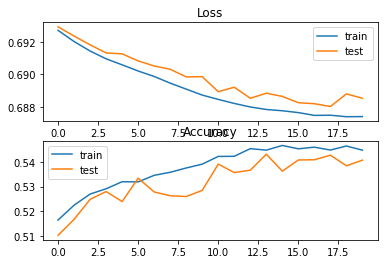

In [36]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [38]:
pred_nn = model.predict(X_test, batch_size=1, verbose=1)

12399/12399 [==============================] - 12s 997us/step


In [39]:
rounded = [round(x[0]) for x in pred_nn]

In [40]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, rounded))
print(classification_report(y_test, rounded))

0.5406887652230019
              precision    recall  f1-score   support

         0.0       0.56      0.39      0.46      6239
         1.0       0.53      0.69      0.60      6160

    accuracy                           0.54     12399
   macro avg       0.55      0.54      0.53     12399
weighted avg       0.55      0.54      0.53     12399



In [73]:
test_file_url = "https://raw.githubusercontent.com/sudo0809/Credit-Risk-Prediction/main/Test%20Data.csv"
test_df = pd.read_csv(test_file_url,)
test_df.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [74]:
test_data = test_df.drop(['id', 'city', 'state'], axis=1)

In [75]:
test_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years
0,7393090,59,19,single,rented,no,Geologist,4,13
1,1215004,25,5,single,rented,no,Firefighter,5,10
2,8901342,50,12,single,rented,no,Lawyer,9,14
3,1944421,49,9,married,rented,yes,Analyst,3,12
4,13429,25,18,single,rented,yes,Comedian,13,11


In [76]:
test_data.profession.unique(), data.profession.unique()

(array(['Geologist', 'Firefighter', 'Lawyer', 'Analyst', 'Comedian',
        'Economist', 'Artist', 'Flight attendant', 'Secretary', 'Engineer',
        'Technician', 'Physician', 'Politician', 'Psychologist',
        'Scientist', 'Petroleum Engineer', 'Chartered Accountant',
        'Web designer', 'Financial Analyst', 'Software Developer',
        'Official', 'Statistician', 'Drafter', 'Architect',
        'Microbiologist', 'Graphic Designer', 'Designer', 'Army officer',
        'Civil servant', 'Chemical engineer', 'Consultant',
        'Air traffic controller', 'Civil engineer', 'Industrial Engineer',
        'Chef', 'Hotel Manager', 'Surveyor', 'Magistrate',
        'Mechanical engineer', 'Computer operator', 'Technical writer',
        'Technology specialist', 'Librarian', 'Surgeon',
        'Biomedical Engineer', 'Design Engineer', 'Aviator',
        'Computer hardware engineer', 'Fashion Designer', 'Dentist',
        'Police officer'], dtype=object),
 array(['Mechanical_enginee

In [77]:
# test_data.profession.loc[test_data.profession == 'Flight attendant'] = 'Flight_attendant'
# test_data.profession.loc[test_data.profession == 'Petroleum Engineer'] = 'Petroleum_Engineer'
# test_data.profession.loc[test_data.profession == 'Petroleum Engineer'] = 'Petroleum_Engineer'

test_data.profession.replace({'Petroleum Engineer':'Petroleum_Engineer', 'Chartered Accountant':'Chartered_Accountant','Flight attendant':'Flight_attendant',
                              'Web designer':'Web_designer', 'Financial Analyst':'Financial_Analyst','Software Developer':'Software_Developer',
                              'Graphic Designer':'Graphic_Designer','Army officer':'Army_officer', 'Civil servant':'Civil_servant',
                              'Chemical engineer':'Chemical_engineer','Air traffic controller':'Air_traffic_controller',
                              'Civil engineer':'Civil_engineer', 'Industrial Engineer':'Industrial_Engineer','Hotel Manager':'Hotel_Manager',
                              'Mechanical engineer':'Mechanical_engineer', 'Computer operator':'Computer_operator', 'Technical writer':'Technical_writer',
                              'Technology specialist':'Technology_specialist','Biomedical Engineer':'Biomedical_Engineer', 'Design Engineer':'Design_Engineer',
                              'Computer hardware engineer':'Computer_hardware_engineer', 'Fashion Designer':'Fashion_Designer', 'Police officer':'Police_officer'},
                             inplace=True)

In [78]:
test_data['married'] = married_le.transform(test_data['married'])
test_data['house_ownership'] = house_le.transform(test_data['house_ownership'])
test_data['car_ownership'] = car_le.transform(test_data['car_ownership'])
# test_data = hash_enc.fit_transform(test_data)
test_data['profession'] = profession_le.transform(test_data['profession'])
test_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years
0,7393090,59,19,1,2,0,26,4,13
1,1215004,25,5,1,2,0,24,5,10
2,8901342,50,12,1,2,0,30,9,14
3,1944421,49,9,0,2,1,1,3,12
4,13429,25,18,1,2,1,12,13,11


In [79]:
test_X = pd.DataFrame(scaler.fit_transform(test_data))

In [80]:
display(test_X.head())
test_X.shape

,0,1,2,3,4,5,6,7,8
0,0.739054,0.655172,0.95,1.0,1.0,0.0,0.52,0.285714,0.75
1,0.120596,0.068966,0.25,1.0,1.0,0.0,0.48,0.357143,0.00
2,0.890037,0.500000,0.60,1.0,1.0,0.0,0.60,0.642857,1.00
3,0.193614,0.482759,0.45,0.0,1.0,1.0,0.02,0.214286,0.50
4,0.000312,0.068966,0.90,1.0,1.0,1.0,0.24,0.928571,0.25


(28000, 9)

### Predict using Neural Network Model

In [86]:
TrainX = data2.iloc[:, :-1]
TrainY = data2.iloc[:, -1]

In [87]:
optimize  = keras.optimizers.SGD(learning_rate=0.0015)
model.compile(loss='binary_crossentropy',optimizer=optimize ,metrics=['accuracy'])

# my_callbacks = [
#     keras.callbacks.EarlyStopping(patience=5),
#     keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
#                                     save_best_only=True),
#     keras.callbacks.TensorBoard(log_dir='./logs'),
# ]

history_full = model.fit(TrainX, TrainY, epochs=20, batch_size=5, verbose=1)

Epoch 1/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6868 - accuracy: 0.5481
Epoch 2/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6873 - accuracy: 0.5475
Epoch 3/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6872 - accuracy: 0.5474
Epoch 4/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6876 - accuracy: 0.5431
Epoch 5/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6869 - accuracy: 0.5485
Epoch 6/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6867 - accuracy: 0.5487
Epoch 7/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6873 - accuracy: 0.5442
Epoch 8/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6871 - accuracy: 0.5442
Epoch 9/20
12399/12399 [==============================] - 27s 2ms/step - loss: 0.6873 - accuracy: 0.5450
Epoch 10/20
12399/12399 [==============================

In [88]:
pred_y_nn = model.predict(test_X)

rounded = [round(x[0]) for x in pred_y_nn]

np.unique(rounded, return_counts=True)

(array([0, 1]), array([13183, 14817]))

In [90]:
submission = pd.DataFrame({
        "id": test_df['id'],
        "risk_flag": rounded,
    })
submission.to_csv('submission_nn2.csv', index=False)